In [1]:
! pip install pesq pystoi numpy


  Preparing metadata (setup.py) ... done
  Created wheel for pesq: filename=pesq-0.0.4-cp311-cp311-linux_x86_64.whl size=275938 sha256=5330bee12231ec579f56b5c950ab20d707c5ba49e9ab44ebfbefc2b3ed6951a5
  Stored in directory: /root/.cache/pip/wheels/ae/f1/23/2698d0bf31eec2b2aa50623b5d93b6206c49c7155d0e31345d
Successfully built pesq


In [2]:
! pip install asteroid


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import numpy as np
from pesq import pesq
from pystoi import stoi


In [3]:
import os
import torch
import torchaudio
from asteroid.models import BaseModel

model = BaseModel.from_pretrained("JorisCos/DCCRNet_Libri1Mix_enhsingle_16k")
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/asteroid/models/base_models.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  conf = torch.load(cached_model, map_location="cpu")

DCCRNet(
  (encoder): Encoder(
    (filterbank): STFTFB()
  )
  (masker): DCCRMaskNet(
    (encoders): ModuleList(
      (0): DCUNetComplexEncoderBlock(
        (conv): ComplexMultiplicationWrapper(
          (re_module): Conv2d(1, 16, kernel_size=(5, 2), stride=(2, 1), padding=(2, 0), bias=False)
          (im_module): Conv2d(1, 16, kernel_size=(5, 2), stride=(2, 1), padding=(2, 0), bias=False)
        )
        (norm): OnReIm(
          (re_module): BatchNorm(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (im_module): BatchNorm(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (activation): OnReIm(
          (re_module): PReLU(num_parameters=1)
          (im_module): PReLU(num_parameters=1)
        )
      )
      (1): DCUNetComplexEncoderBlock(
        (conv): ComplexMultiplicationWrapper(
          (re_module): Conv2d(16, 32, kernel_size=(5, 2), stride=(2, 1), padding=(2, 0), bias=False)
          (im_module): Conv2

In [5]:
marathi_files = [f"/content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_{i+1}.wav" for i in range(5)]
english_files = [f"/content/drive/MyDrive/english_noise_audios/english_noisy_processed_{i+1}.wav" for i in range(5)]

output_dir = "/content/drive/MyDrive/DCCRN/"
os.makedirs(output_dir, exist_ok=True)

In [6]:
def load_audio(filepath, target_sr=16000):
    """Load an audio file and resample it to 16kHz if needed."""
    waveform, sr = torchaudio.load(filepath)
    if sr != target_sr:
        resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=target_sr)
        waveform = resampler(waveform)
    return waveform

def denoise_and_save(input_path, output_path):
    """Denoise the given audio file and save the enhanced version."""
    if not os.path.exists(input_path):
        print(f"File not found: {input_path}")
        return

    waveform = load_audio(input_path)

    with torch.no_grad():
        enhanced_waveform = model(waveform.unsqueeze(0))

    torchaudio.save(output_path, enhanced_waveform.squeeze(0), 16000)
    print(f"Enhanced audio saved at: {output_path}")

# Process English files
print("Processing English files...")

for i, file in enumerate(english_files):
    output_filename = os.path.join(output_dir, f"DCCRN_denoised_english_{i+1}.wav")
    denoise_and_save(file, output_filename)

print("English Speech Enhancement Completed.")

# Process Marathi files
print("Processing Marathi files...")

for i, file in enumerate(marathi_files):
    output_filename = os.path.join(output_dir, f"DCCRN_denoised_marathi_{i+1}.wav")
    denoise_and_save(file, output_filename)

print("Marathi Speech Enhancement Completed.")

Processing English files...
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_english_1.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_english_2.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_english_3.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_english_4.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_english_5.wav
English Speech Enhancement Completed.
Processing Marathi files...
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_marathi_1.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_marathi_2.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_marathi_3.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_marathi_4.wav
Enhanced audio saved at: /content/drive/MyDrive/DCCRN/DCCRN_denoised_marathi_5.wav
Marathi Speech Enhancement Completed.


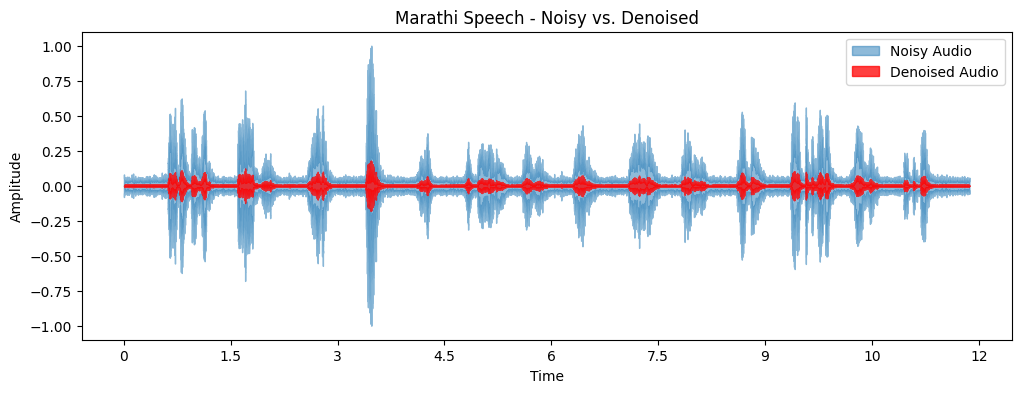

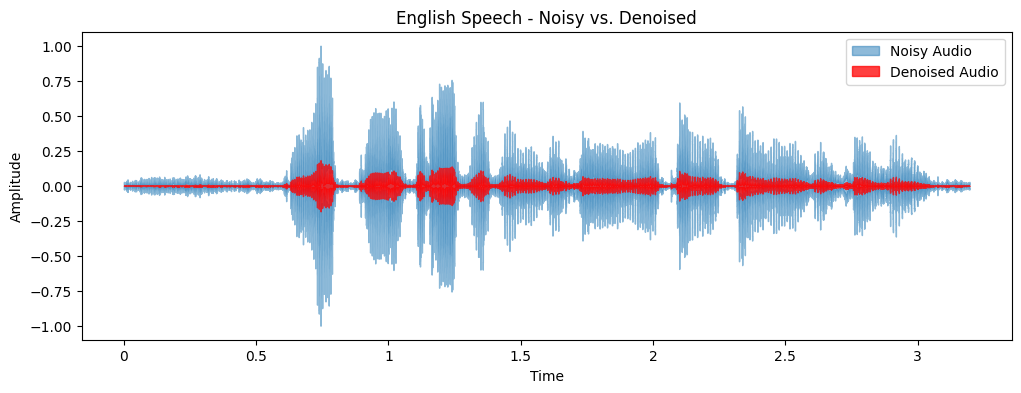

In [8]:
def plot_waveforms(noisy_file, denoised_file, title):
    noisy_audio, sr = librosa.load(noisy_file, sr=16000)
    denoised_audio, _ = librosa.load(denoised_file, sr=16000)

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(noisy_audio, sr=sr, alpha=0.5, label="Noisy Audio")
    librosa.display.waveshow(denoised_audio, sr=sr, alpha=0.75, label="Denoised Audio", color='r')
    plt.title(f"{title} - Noisy vs. Denoised")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

# Example: Compare One Marathi & One English File for DCCRNet
plot_waveforms(marathi_files[0], f"{output_dir}DCCRN_denoised_marathi_1.wav", "Marathi Speech")
plot_waveforms(english_files[0], f"{output_dir}DCCRN_denoised_english_1.wav", "English Speech")


In [10]:
marathi_noisy_files = [f"/content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_{i+1}.wav" for i in range(5)]
marathi_denoised_files = [f"/content/drive/MyDrive/DCCRN/DCCRN_denoised_marathi_{i+1}.wav" for i in range(5)]

english_noisy_files =  [f"/content/drive/MyDrive/english_noise_audios/english_noisy_processed_{i+1}.wav" for i in range(5)]
english_denoised_files = [f"/content/drive/MyDrive/DCCRN/DCCRN_denoised_english_{i+1}.wav" for i in range(5)]


results = []

def evaluate_quality(noisy_file, denoised_file, sr=16000):
    noisy_audio, _ = librosa.load(noisy_file, sr=sr)
    denoised_audio, _ = librosa.load(denoised_file, sr=sr)

    stoi_score = stoi(noisy_audio, denoised_audio, sr)

    pesq_score = pesq(sr, noisy_audio, denoised_audio, "nb")

    return pesq_score, stoi_score

print("\nEvaluating Marathi Speech Enhancement...")
for i in range(5):
    hindi_pesq, hindi_stoi = evaluate_quality(marathi_noisy_files[i], marathi_denoised_files[i])
    print(f"Marathi File {i+1} -> PESQ: {hindi_pesq:.3f}, STOI: {hindi_stoi:.3f}")
    results.append(["Marathi", i+1, hindi_pesq, hindi_stoi])

print("\nEvaluating English Speech Enhancement...")
for i in range(5):
    english_pesq, english_stoi = evaluate_quality(english_noisy_files[i], english_denoised_files[i])
    print(f"English File {i+1} -> PESQ: {english_pesq:.3f}, STOI: {english_stoi:.3f}")
    results.append(["English", i+1, english_pesq, english_stoi])

hindi_avg_pesq = np.mean([row[2] for row in results if row[0] == "Marathi"])
hindi_avg_stoi = np.mean([row[3] for row in results if row[0] == "Marathi"])

english_avg_pesq = np.mean([row[2] for row in results if row[0] == "English"])
english_avg_stoi = np.mean([row[3] for row in results if row[0] == "English"])

print("\nAverage Results:")
print(f"Marathi -> PESQ: {hindi_avg_pesq:.3f}, STOI: {hindi_avg_stoi:.3f}")
print(f"English -> PESQ: {english_avg_pesq:.3f}, STOI: {english_avg_stoi:.3f}")


Evaluating Marathi Speech Enhancement...
Marathi File 1 -> PESQ: 3.923, STOI: 0.897
Marathi File 2 -> PESQ: 4.050, STOI: 0.954
Marathi File 3 -> PESQ: 4.298, STOI: 0.970
Marathi File 4 -> PESQ: 4.228, STOI: 0.980
Marathi File 5 -> PESQ: 4.344, STOI: 0.955

Evaluating English Speech Enhancement...
English File 1 -> PESQ: 3.350, STOI: 0.944
English File 2 -> PESQ: 1.953, STOI: 0.832
English File 3 -> PESQ: 2.337, STOI: 0.825
English File 4 -> PESQ: 4.118, STOI: 0.972
English File 5 -> PESQ: 3.190, STOI: 0.928

Average Results:
Marathi -> PESQ: 4.168, STOI: 0.951
English -> PESQ: 2.990, STOI: 0.900
